In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Load the data

In [15]:
data = pd.read_csv('/content/ipl_dataset.csv')

Encode categorical variables using a loop

In [16]:
columns_to_encode = ['team1', 'team2', 'toss_winner', 'toss_choice', 'winner', 'man_of_the_match', 'stadium', 'place']
label_encoders = {col: LabelEncoder() for col in columns_to_encode}

for col in columns_to_encode:
    data[col] = label_encoders[col].fit_transform(data[col])

Create feature matrix X and target vector y


In [17]:
X = data[['team1', 'team2', 'toss_winner', 'toss_choice', 'stadium', 'place']]
y = data['winner']

Split the data into training and testing sets

*   30% for testing
*   70% for training


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

Initialize and train the Multiplayer Perceptron model

In [48]:
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=20)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=1000, random_state=20)

Make predictions on the test set

In [49]:
y_pred = model.predict(X_test)

Evaluate the model

In [50]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.40

Classification Report:
              precision    recall  f1-score   support

           0       0.21      0.33      0.26         9
           1       0.50      0.12      0.20         8
           2       0.50      0.24      0.32        21
           3       0.50      0.20      0.29         5
           4       0.50      0.52      0.51        31
           5       0.29      0.33      0.31        27
           6       0.00      0.00      0.00         3
           8       0.38      0.33      0.35        45
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         3
          11       0.33      0.29      0.31        31
          12       0.41      0.36      0.39        33
          13       0.41      0.78      0.54        18
          14       0.54      0.83      0.65        36
          15       0.25      0.50      0.33         2
          16       0.00      0.00      0.00         3
          17       0.00      0.00      0.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix

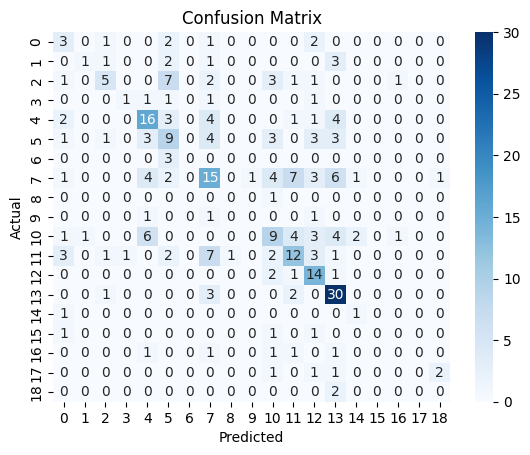

The confusion matrix helps to understand misclassifications.


In [51]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("The confusion matrix helps to understand misclassifications.")

Bar plot of actual vs predicted

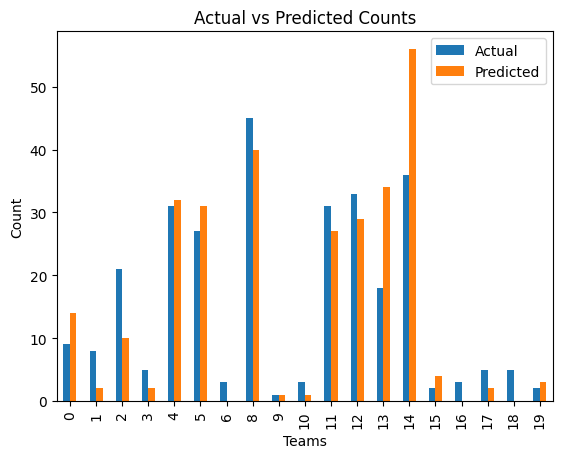

Top performing teams and those frequently predicted can be identified from the bar plot.


In [52]:
predicted_counts = pd.Series(y_pred).value_counts().sort_index()
actual_counts = pd.Series(y_test).value_counts().sort_index()
df_counts = pd.DataFrame({'Actual': actual_counts, 'Predicted': predicted_counts})
df_counts.plot(kind='bar')
plt.title('Actual vs Predicted Counts')
plt.xlabel('Teams')
plt.ylabel('Count')
plt.show()

print("Top performing teams and those frequently predicted can be identified from the bar plot.")

Testing

In [53]:
decoded_actual = label_encoders['winner'].inverse_transform(y_test[:10])
decoded_predicted = label_encoders['winner'].inverse_transform(y_pred[:10])

sample_predictions = pd.DataFrame({'Actual': decoded_actual, 'Predicted': decoded_predicted})
print("Sample Predictions with Team Names:")
print(sample_predictions)


Sample Predictions with Team Names:
      Actual   Predicted
0     Royals      Royals
1  Sunrisers   Sunrisers
2      Super       Super
3      Kings       Kings
4     Royals      Royals
5     Mumbai         KKR
6      Super  Daredevils
7     Mumbai      Mumbai
8        KKR         KKR
9        RCB       Super
